##  <span style='color:green '>Evaluate Models</span>

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
import nfl_data_py as nfl

###  <span style='color:green '> Set up variables to be used in Fit Determination Function</span>

In [2]:
index = []
scores = {'Train Score': [], "Test Score": [], 'Test Train Difference': [], 'Scaler': []}
scalers = ["none", StandardScaler(), MinMaxScaler(), MaxAbsScaler(), RobustScaler()]
models = [LinearRegression(),
          LogisticRegression(),
          KNeighborsRegressor(),
          RandomForestRegressor(),
          RandomForestClassifier(),
          ExtraTreesRegressor(),
          ExtraTreesClassifier(),
          AdaBoostRegressor(),
          AdaBoostClassifier()]

###  <span style='color:green '>Define Function to Test Models and Scalers</span>

In [3]:
def test_model(data):
    for scaler in scalers:
        global index
        global scores
        if scaler != "none":
            scaler.fit(X_train)
            X_train_scaled = scaler.transform(X_train)
            X_test_scaled = scaler.transform(X_test)
        else:
            X_train_scaled = X_train
            X_test_scaled = X_test
        data = X_train_scaled, X_test_scaled, y_train, y_test
        for model in models:
            reg = model.fit(X_train_scaled, y_train)
            y_pred = reg.predict(X_test_scaled)
            scores["Train Score"].append(reg.score(X_train_scaled, y_train))
            scores["Test Score"].append(reg.score(X_test_scaled, y_test))
            scores["Test Train Difference"].append((reg.score(X_train_scaled, y_train)-(reg.score(X_test_scaled, y_test))))
            scores["Scaler"].append(scaler)
            index += [type(reg).__name__]

###  <span style='color:green '>Get data and evaluate readiness for model</span>

 <span style='color:green '>* Find features and target 
     * Test for imbalance </span>

In [4]:
nfl.see_pbp_cols()

Index(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       ...
       'out_of_bounds', 'home_opening_kickoff', 'qb_epa', 'xyac_epa',
       'xyac_mean_yardage', 'xyac_median_yardage', 'xyac_success', 'xyac_fd',
       'xpass', 'pass_oe'],
      dtype='object', length=372)

In [5]:
pbp2021 = nfl.import_pbp_data(years=[2021], downcast=True, cache=False, alt_path=None)
pbp2021

2021 done.
Downcasting floats.


,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,None,None,None,...,0.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0.0,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0.0,1.0,-1.399805,NaN,NaN,NaN,NaN,NaN,0.491433,-49.143299
3,76.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0.0,1.0,0.032412,1.165133,5.803177,4.0,0.896654,0.125098,0.697346,30.265415
4,100.0,2021_01_ARI_TEN,2021091207,TEN,ARI,REG,1,TEN,home,ARI,...,0.0,1.0,-1.532898,0.256036,4.147637,2.0,0.965009,0.965009,0.978253,2.174652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50707,3930.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,CIN,home,LA,...,0.0,0.0,-1.215366,NaN,NaN,NaN,NaN,NaN,0.681295,-68.129547
50708,3951.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,None,None,None,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50709,3968.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,CIN,home,LA,...,0.0,0.0,-0.623479,0.271249,4.355069,2.0,0.998861,0.998861,0.747601,25.239891
50710,3990.0,2021_22_LA_CIN,2022021300,CIN,LA,POST,22,LA,away,CIN,...,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# load additional team data 
pbpclean = pbp2021
teams = nfl.import_team_desc()
players = nfl.import_rosters([2021])
player_seasons = nfl.import_seasonal_data([2021])

In [7]:
player_seasons

,player_id,season,season_type,completions,attempts,passing_yards,passing_tds,interceptions,sacks,sack_yards,...,yac_sh,wopr_y,ry_sh,rtd_sh,rfd_sh,rtdfd_sh,dom,w8dom,yptmpa,ppr_sh
0,00-0019596,2021,REG,485,719,5316.0,43,12.0,22.0,144.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.195705
1,00-0022824,2021,REG,0,0,0.0,0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.022883
2,00-0022924,2021,REG,390,605,3740.0,22,10.0,38.0,239.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.164071
3,00-0023459,2021,REG,366,531,4115.0,37,4.0,30.0,188.0,...,0.000000,0.001939,-0.000923,0.000000,0.000000,0.000000,-0.000461,-0.000738,-0.007156,0.207297
4,00-0023682,2021,REG,3,6,13.0,0,0.0,1.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,00-0037004,2021,REG,0,0,0.0,0,0.0,0.0,0.0,...,0.015625,0.047322,0.010076,0.000000,0.000000,0.000000,0.005038,0.008060,0.068966,0.006251
651,00-0037005,2021,REG,0,0,0.0,0,0.0,0.0,0.0,...,0.048985,0.165644,0.063003,0.090909,0.074627,0.075862,0.076956,0.068584,0.360000,0.053186
652,00-0037011,2021,REG,0,0,0.0,0,0.0,0.0,0.0,...,0.036836,0.054752,0.023974,0.000000,0.030303,0.026786,0.011987,0.019180,0.177165,0.015674
653,00-0037012,2021,REG,41,71,603.0,5,2.0,4.0,15.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.119558


In [8]:

f = pbp2021[["week",
             'home_team',
             'away_team',
             "posteam_type",
             'yardline_100',
             'quarter_seconds_remaining',
             'drive',
             'qtr',
             'down',
             'ydstogo',
             'ydsnet',
             'play_type',
             'yards_gained',
             'posteam_timeouts_remaining',
             'score_differential',
             'epa',
             'series',
             'series_result',
             'play_type_nfl',
             'drive_play_count',
             'drive_time_of_possession',
             'drive_first_downs',
             'drive_inside20',
             'drive_ended_with_score',
             'drive_yards_penalized',
             'drive_start_transition',
             'drive_end_transition',
             'away_score',
             'home_score',
             'location',
             'result'              
                  ]]

In [9]:
f

,week,home_team,away_team,posteam_type,yardline_100,quarter_seconds_remaining,drive,qtr,down,ydstogo,...,drive_first_downs,drive_inside20,drive_ended_with_score,drive_yards_penalized,drive_start_transition,drive_end_transition,away_score,home_score,location,result
0,1,TEN,ARI,None,NaN,900.0,NaN,1.0,NaN,0.0,...,NaN,NaN,NaN,NaN,None,None,38,13,Home,-25
1,1,TEN,ARI,home,35.0,900.0,1.0,1.0,NaN,0.0,...,0.0,0.0,0.0,0.0,KICKOFF,PUNT,38,13,Home,-25
2,1,TEN,ARI,home,75.0,900.0,1.0,1.0,1.0,10.0,...,0.0,0.0,0.0,0.0,KICKOFF,PUNT,38,13,Home,-25
3,1,TEN,ARI,home,78.0,863.0,1.0,1.0,2.0,13.0,...,0.0,0.0,0.0,0.0,KICKOFF,PUNT,38,13,Home,-25
4,1,TEN,ARI,home,75.0,822.0,1.0,1.0,3.0,10.0,...,0.0,0.0,0.0,0.0,KICKOFF,PUNT,38,13,Home,-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50707,22,CIN,LA,home,49.0,48.0,25.0,4.0,3.0,1.0,...,1.0,0.0,0.0,0.0,KICKOFF,DOWNS,23,20,Neutral,-3
50708,22,CIN,LA,None,NaN,43.0,25.0,4.0,NaN,0.0,...,1.0,0.0,0.0,0.0,KICKOFF,DOWNS,23,20,Neutral,-3
50709,22,CIN,LA,home,49.0,43.0,25.0,4.0,4.0,1.0,...,1.0,0.0,0.0,0.0,KICKOFF,DOWNS,23,20,Neutral,-3
50710,22,CIN,LA,away,51.0,39.0,26.0,4.0,1.0,10.0,...,0.0,0.0,0.0,0.0,DOWNS,END_GAME,23,20,Neutral,-3


In [10]:
f["result"].value_counts()

-3     4563
 3     3538
-7     2015
-6     2005
 6     1676
       ... 
 19     168
 39     167
-38     167
-31     165
 38     163
Name: result, Length: 66, dtype: int64

In [11]:
# Convert categorical data to numeric with `pd.get_dummies`
f = pd.get_dummies(f,dtype=float)
f.head(100)

,week,yardline_100,quarter_seconds_remaining,drive,qtr,down,ydstogo,ydsnet,yards_gained,posteam_timeouts_remaining,...,drive_end_transition_FIELD_GOAL,drive_end_transition_FUMBLE,drive_end_transition_FUMBLE_SAFETY,drive_end_transition_INTERCEPTION,drive_end_transition_MISSED_FG,drive_end_transition_PUNT,drive_end_transition_SAFETY,drive_end_transition_TOUCHDOWN,location_Home,location_Neutral
0,1,NaN,900.0,NaN,1.0,NaN,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,35.0,900.0,1.0,1.0,NaN,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,75.0,900.0,1.0,1.0,1.0,10.0,0.0,-3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,78.0,863.0,1.0,1.0,2.0,13.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,75.0,822.0,1.0,1.0,3.0,10.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,64.0,14.0,12.0,2.0,1.0,10.0,48.0,12.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
96,1,NaN,8.0,12.0,2.0,NaN,0.0,48.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
97,1,NaN,8.0,12.0,2.0,NaN,0.0,48.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
98,1,52.0,8.0,12.0,2.0,1.0,10.0,48.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
f = f.fillna(0)
f

,week,yardline_100,quarter_seconds_remaining,drive,qtr,down,ydstogo,ydsnet,yards_gained,posteam_timeouts_remaining,...,drive_end_transition_FIELD_GOAL,drive_end_transition_FUMBLE,drive_end_transition_FUMBLE_SAFETY,drive_end_transition_INTERCEPTION,drive_end_transition_MISSED_FG,drive_end_transition_PUNT,drive_end_transition_SAFETY,drive_end_transition_TOUCHDOWN,location_Home,location_Neutral
0,1,0.0,900.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,35.0,900.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,75.0,900.0,1.0,1.0,1.0,10.0,0.0,-3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1,78.0,863.0,1.0,1.0,2.0,13.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1,75.0,822.0,1.0,1.0,3.0,10.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50707,22,49.0,48.0,25.0,4.0,3.0,1.0,26.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50708,22,0.0,43.0,25.0,4.0,0.0,0.0,26.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50709,22,49.0,43.0,25.0,4.0,4.0,1.0,26.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50710,22,51.0,39.0,26.0,4.0,1.0,10.0,-1.0,-1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


###  <span style='color:green '>Create X and Y | Reshape the data</span>

In [13]:
# Create X (features) and y (target) sets
X = f.drop("result", axis=1)
y = f["result"].values
print("Shape: ", X.shape, y.shape)

Shape:  (50712, 678) (50712,)


In [14]:
# Standarize data with StandarScaler
fs = StandardScaler().fit_transform(f)
print(fs[0:1])

   week  yardline_100  quarter_seconds_remaining  drive  qtr  down  ydstogo  \
0     1           0.0                      900.0    0.0  1.0   0.0      0.0   

   ydsnet  yards_gained  posteam_timeouts_remaining  ...  \
0     0.0           0.0                         0.0  ...   

   drive_end_transition_FIELD_GOAL  drive_end_transition_FUMBLE  \
0                              0.0                          0.0   

   drive_end_transition_FUMBLE_SAFETY  drive_end_transition_INTERCEPTION  \
0                                 0.0                                0.0   

   drive_end_transition_MISSED_FG  drive_end_transition_PUNT  \
0                             0.0                        0.0   

   drive_end_transition_SAFETY  drive_end_transition_TOUCHDOWN  location_Home  \
0                          0.0                             0.0            1.0   

   location_Neutral  
0               0.0  

[1 rows x 679 columns]


###  <span style='color:green '> PCA</span>
<span style='color:green '> Applying PCA to reduce dimensions while preserving 90% of the explained variance </span>

In [15]:
# Applying PCA to reduce dimensions while preserving 90% of the explained variance 
# Initialize PCA model by setting n-components to desired level
pca = PCA(n_components= 25)

# Fit our new Principal Component Analysis reduced Features to our Model
pfa = pca.fit_transform(fs)

# Transform PCA data to a DataFrame
pf = pd.DataFrame(data=pfa)
pf.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2.865897,1.198104,3.793203,0.648830,-2.437397,-2.31342,1.262405,0.154367,2.914506,-1.231799,...,-1.517933,0.380160,-1.980758,0.256350,-0.280381,-0.977233,-1.012796,1.678460,-0.18026,-0.860992
1,3.649840,-0.105703,4.720742,-1.406001,-1.848586,-4.08074,0.390323,0.019781,-1.552287,0.937644,...,-1.961548,-1.430186,-0.992530,0.194931,-0.210930,-0.083078,-0.517110,0.818684,0.42895,0.170351


In [16]:
# Create X (features) and y (target) sets
X = pf
y = f["result"].values
print("Shape: ", X.shape, y.shape)

Shape:  (50712, 25) (50712,)


###  <span style='color:green '>Split data into Training and Testing sets</span>

In [17]:
# Split the data into training and testing sets
data = X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

###  <span style='color:green '>Get to know our data</span>

Training Data Score: 0.9924075791306171
Testing Data Score: 0.9469597291720662
[0.00494355 0.00217976 0.00303742 0.01548223 0.00492606 0.33384797
 0.51283987 0.02145781 0.00797664 0.0071892  0.0027204  0.00591081
 0.00454785 0.00370947 0.0047138  0.00469395 0.00767267 0.00460578
 0.00544276 0.00843249 0.00500213 0.00646556 0.00771519 0.00761448
 0.00687216]


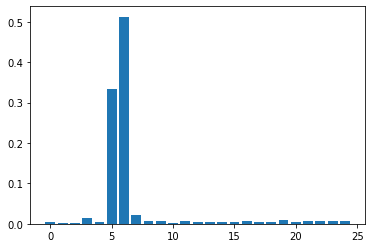

Wall time: 1min 10s


In [22]:
%%time
# setting Random forest as sample to view data 
classifier = RandomForestRegressor()
clf = classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

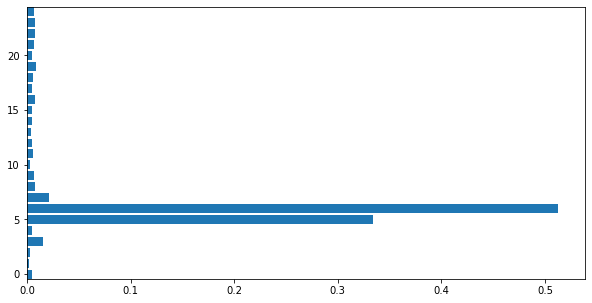

Wall time: 170 ms


In [23]:
%%time
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

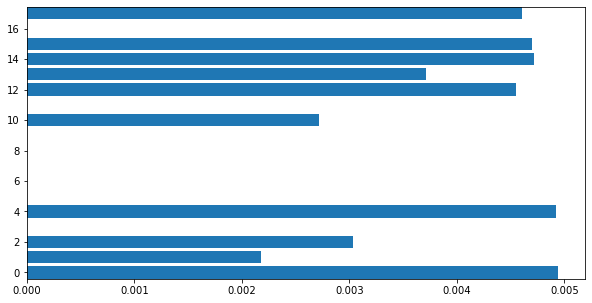

Wall time: 170 ms


In [25]:
%%time
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
features = features[:10]
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [26]:
%%time
# call function test_model to test all models being considered
test_model(data)

Wall time: 21min 4s


In [28]:
# Print by Training Score
df_scores = pd.DataFrame(scores, index=index)
df_scores.sort_values('Train Score', ascending=False).head(10)

,Train Score,Test Score,Test Train Difference,Scaler
RandomForestClassifier,1.0,0.900852,0.099148,MinMaxScaler()
RandomForestClassifier,1.0,0.898170,0.101830,RobustScaler()
ExtraTreesClassifier,1.0,0.915444,0.084556,MinMaxScaler()
ExtraTreesRegressor,1.0,0.953806,0.046194,MinMaxScaler()
RandomForestClassifier,1.0,0.899826,0.100174,MaxAbsScaler()
ExtraTreesRegressor,1.0,0.953900,0.046100,MaxAbsScaler()
ExtraTreesClassifier,1.0,0.909528,0.090472,MaxAbsScaler()
ExtraTreesClassifier,1.0,0.912447,0.087553,StandardScaler()
ExtraTreesRegressor,1.0,0.954297,0.045703,StandardScaler()
RandomForestClassifier,1.0,0.897618,0.102382,StandardScaler()


In [29]:
# Print by Testing Score
df_scores.sort_values('Test Score', ascending=False).head(10)

,Train Score,Test Score,Test Train Difference,Scaler
ExtraTreesRegressor,1.000000,0.954297,0.045703,StandardScaler()
ExtraTreesRegressor,1.000000,0.954129,0.045871,none
ExtraTreesRegressor,1.000000,0.953902,0.046098,RobustScaler()
ExtraTreesRegressor,1.000000,0.953900,0.046100,MaxAbsScaler()
ExtraTreesRegressor,1.000000,0.953806,0.046194,MinMaxScaler()
RandomForestRegressor,0.992507,0.946784,0.045724,MaxAbsScaler()
RandomForestRegressor,0.992458,0.946759,0.045700,RobustScaler()
RandomForestRegressor,0.992391,0.946472,0.045919,none
RandomForestRegressor,0.992411,0.946267,0.046145,StandardScaler()
RandomForestRegressor,0.992474,0.946232,0.046243,MinMaxScaler()


In [30]:
# Print by Testing Score
df_scores['Test Train Magnitude'] = abs(df_scores['Test Train Difference'])
df_scores.sort_values('Test Train Magnitude').head(10)

,Train Score,Test Score,Test Train Difference,Scaler,Test Train Magnitude
AdaBoostClassifier,0.095415,0.094494,0.000920,RobustScaler(),0.000920
AdaBoostClassifier,0.095415,0.094494,0.000920,MaxAbsScaler(),0.000920
AdaBoostClassifier,0.095415,0.094494,0.000920,MinMaxScaler(),0.000920
AdaBoostClassifier,0.095415,0.094494,0.000920,StandardScaler(),0.000920
AdaBoostClassifier,0.095415,0.094494,0.000920,none,0.000920
LinearRegression,0.901161,0.899393,0.001769,RobustScaler(),0.001769
LinearRegression,0.901161,0.899393,0.001769,MaxAbsScaler(),0.001769
LinearRegression,0.901161,0.899393,0.001769,MinMaxScaler(),0.001769
LinearRegression,0.901161,0.899393,0.001769,StandardScaler(),0.001769
LinearRegression,0.901161,0.899393,0.001769,none,0.001769
